#INTRODUCCION

Las opiniones de los usuarios juegan un papel clave en la percepción y mejora de productos y servicios. El presente dataset contiene reseñas y valoraciones de usuarios sobre la aplicación de compras de Amazon, actualizadas de forma diaria. Además de los comentarios, se incluye información relevante como la fecha de publicación y la pertinencia de cada reseña.

El objetivo de este análisis es aplicar técnicas de Deep Learning para extraer patrones, sentimientos y conocimientos a partir del lenguaje natural presente en los textos. El Deep Learning, rama del aprendizaje automático basada en redes neuronales, permite procesar grandes volúmenes de datos no estructurados —como las opiniones de los usuarios— con el fin de entender su satisfacción, detectar puntos de mejora y construir modelos predictivos.

Mediante este enfoque, se busca explorar el potencial del procesamiento de texto automatizado para asistir en la toma de decisiones orientadas al usuario y a la mejora continua de productos digitales.

https://www.kaggle.com/datasets/ashishkumarak/amazon-shopping-reviews-daily-updated

##LIMPIEZA

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Julieta398/Data-Science-III/main/amazon_reviews.csv"
df = pd.read_csv(url)
df.head()


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,3ffa1ba1-6e27-4b93-a954-90e76936ad8d,Dhramik Television,I had the worst experience with the Amazon sho...,1,0,NaN,2025-07-21 12:25:20,NaN
1,6a156a10-fe77-4118-a9b2-a163ae2fdbb4,Caroline Mc,love it prime ❤️,5,0,30.13.0.100,2025-07-21 12:01:53,30.13.0.100
2,d8453dda-35e3-41df-99e3-fe608728ce76,Malwolfmoon,I've ordered several items and amazon just kee...,1,0,30.12.4.100,2025-07-21 11:58:39,30.12.4.100
3,d1fa5b07-8610-4dde-b7bd-95bd65c570cb,Nhel Flores,very good service,5,0,30.13.0.100,2025-07-21 11:40:27,30.13.0.100
4,4afbe79c-e869-4828-9833-913f85a1ec46,Kelly McCowin,"Safely Shop from home! Saves time, effort and ...",5,0,30.13.0.100,2025-07-21 11:36:58,30.13.0.100


In [2]:
print(df.columns)
df.info()
df.sample(5)


Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76669 entries, 0 to 76668
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              76669 non-null  object
 1   userName              76663 non-null  object
 2   content               76663 non-null  object
 3   score                 76669 non-null  int64 
 4   thumbsUpCount         76669 non-null  int64 
 5   reviewCreatedVersion  68054 non-null  object
 6   at                    76669 non-null  object
 7   appVersion            68054 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.7+ MB


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
36239,d8ddadf9-2e84-4c04-924e-39a980ec3d92,Danielle Stark,Refunds are ridiculously delayed. Ive returned...,1,0,NaN,2024-02-21 14:05:44,NaN
73770,803a7ba8-fdae-45f5-a985-68ed73e4ac8a,BARBARA BURKE,I can at least find what I may need for my van...,5,0,22.14.0.100,2021-07-31 17:23:28,22.14.0.100
75035,882b9457-4db5-4b40-900f-00ab51dcb6ac,A Google user,After the latest update (Feb 2023) app is glic...,3,1,26.4.0.100,2023-02-19 18:34:15,26.4.0.100
4791,4c134865-c567-485c-a78f-3075061f1c80,Christine Cartwright,Items in shopping cart don't update properly w...,3,0,30.6.0.100,2025-03-31 00:53:21,30.6.0.100
69997,ce8c5579-2ae0-4ae2-86c5-e62fe81b9fd8,Geovanni Sikaffy,quick and easy.,5,0,26.23.4.100,2024-01-07 22:00:16,26.23.4.100


In [3]:
import re

# Eliminacion de filas sin contenido
df = df[df['content'].notna()]

# Limpieza de texto básico
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # quitar signos
    texto = re.sub(r'\d+', '', texto)      # quitar números
    texto = texto.strip()
    return texto

df['texto_limpio'] = df['content'].apply(limpiar_texto)

# Revision distribución de puntajes
print(df['score'].value_counts().sort_index())

# Definicion X (texto) e y (clase)
X = df['texto_limpio'].values
y = df['score'].values


score
1    35209
2     8361
3     6478
4     5026
5    21589
Name: count, dtype: int64


##ANALISIS EXPLORATORIO

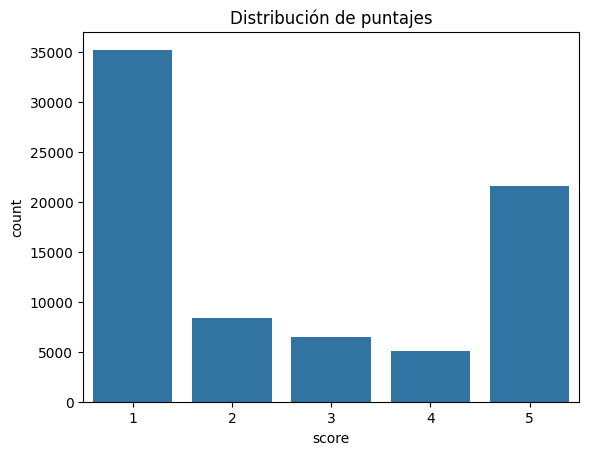

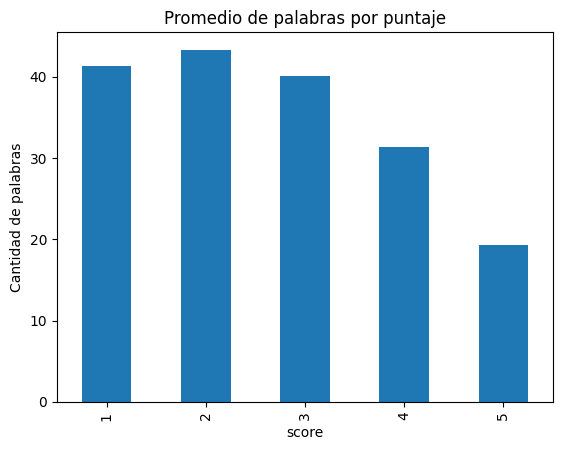

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de puntajes
sns.countplot(data=df, x='score')
plt.title("Distribución de puntajes")
plt.show()

# Cantidad promedio de palabras por review según score
df['longitud'] = df['texto_limpio'].apply(lambda x: len(x.split()))
df.groupby('score')['longitud'].mean().plot(kind='bar', title='Promedio de palabras por puntaje')
plt.ylabel('Cantidad de palabras')
plt.show()


Se observa una distribución desequilibrada de puntajes, donde las reseñas con calificación 1 y 5 son las más frecuentes, especialmente las negativas (puntaje 1). Esto sugiere que los usuarios tienden a dejar reseñas cuando tienen experiencias muy malas o muy buenas.

Además, las reseñas con puntajes bajos contienen más palabras en promedio, lo que indica que los usuarios expresan más detalles al quejarse que al dejar opiniones positivas, que suelen ser más breves.

##ENTRENAMIENTO DE RED NEURONAL

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,113 (2.45 MB)

 Trainable params: 642,113 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6425 - loss: 0.6418 - val_accuracy: 0.7589 - val_loss: 0.5345
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7711 - loss: 0.5191 - val_accuracy: 0.8098 - val_loss: 0.4484
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8376 - loss: 0.4164 - val_accuracy: 0.8767 - val_loss: 0.3428
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8834 - loss: 0.3264 - val_accuracy: 0.8982 - val_loss: 0.2963
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.2887 - val_accuracy: 0.8970 - val_loss: 0.2827
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9037 - loss: 0.2723

🔍 Accuracy en test: 0.9043
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🔍 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10050
           1       0.94      0.77      0.85      5283

    accuracy                         

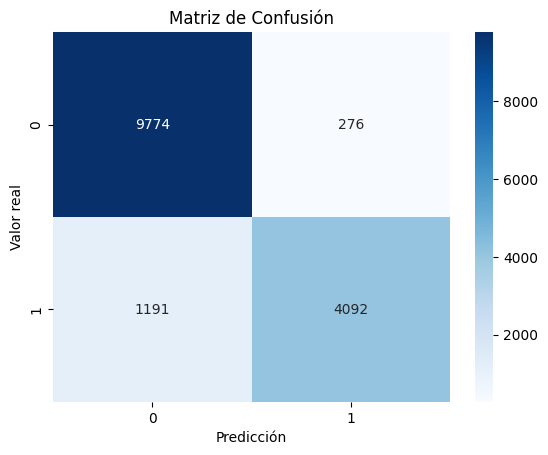

In [5]:
#  Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import Input
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Dataset
url = "https://raw.githubusercontent.com/Julieta398/Data-Science-III/main/amazon_reviews.csv"
df = pd.read_csv(url)

# Filtrar y preparar datos binarios (positiva/negativa)
df_binario = df[df['score'].isin([1, 2, 3, 4, 5])].copy()
df_binario.dropna(subset=['content'], inplace=True)
df_binario['sentimiento'] = df_binario['score'].apply(lambda x: 1 if x >= 4 else 0)

# Tokenización
max_words = 10000
max_len = 150
embedding_dim = 64

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_binario['content'])
sequences = tokenizer.texts_to_sequences(df_binario['content'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(padded, df_binario['sentimiento'].values, test_size=0.2, random_state=42)

# Definir modelo

model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=max_words, output_dim=embedding_dim), #Capa embedding
    GlobalAveragePooling1D(), #Capa pooling
    Dense(32, activation='relu'), #Capa densa
    Dense(1, activation='sigmoid') #Capa de salida
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=512)

# Evaluar modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🔍 Accuracy en test: {accuracy:.4f}")

# Reporte de métricas
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n🔍 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


Se eligió una red neuronal simple con 4 capas (Embedding, Pooling, densa oculta, de salida) porque es una arquitectura eficiente para tareas básicas de clasificación de texto. Este tipo de red captura representaciones semánticas generales del texto sin requerir gran capacidad computacional, lo cual es adecuado para un dataset de reviews simples y balanceados. A diferencia de las RNN o CNN, que son útiles para modelar secuencias complejas o patrones locales específicos, esta arquitectura logra buenos resultados con menor tiempo de entrenamiento y menor riesgo de sobreajuste.


Durante el entrenamiento (5 épocas), se observó una mejora constante en la precisión y la reducción de la pérdida (loss) tanto en el conjunto de entrenamiento como en el de validación, alcanzando una precisión final de validación alrededor del 89% y en test del 90%. Sugiere que no hubo sobreajuste significativo y que el modelo generaliza bien.

La matriz de confusión indica que:

TN (Verdadero Negativo): 9774

FP (Falso Positivo): 276

FN (Falso Negativo): 1191

TP (Verdadero Positivo): 4092

Esto sugiere que el modelo tiene buen desempeño, con un equilibrio razonable entre falsos positivos y falsos negativos, aunque hay una mayor proporción de falsos negativos comparada con falsos positivos.

Conclusiones

Buen desempeño general: El modelo logró un accuracy del 90%, lo que es un buen resultado para un problema de clasificación binaria.

Posible mejora en falsos negativos: Los 1191 falsos negativos indican que algunas instancias positivas no fueron detectadas, y mejorar en este aspecto podría ser importante dependiendo del contexto y la criticidad del error.

Métricas robustas: Los F1-scores (0.93 para clase 0 y 0.85 para clase 1) reflejan un buen balance entre precisión y recall.

##COMPARACION

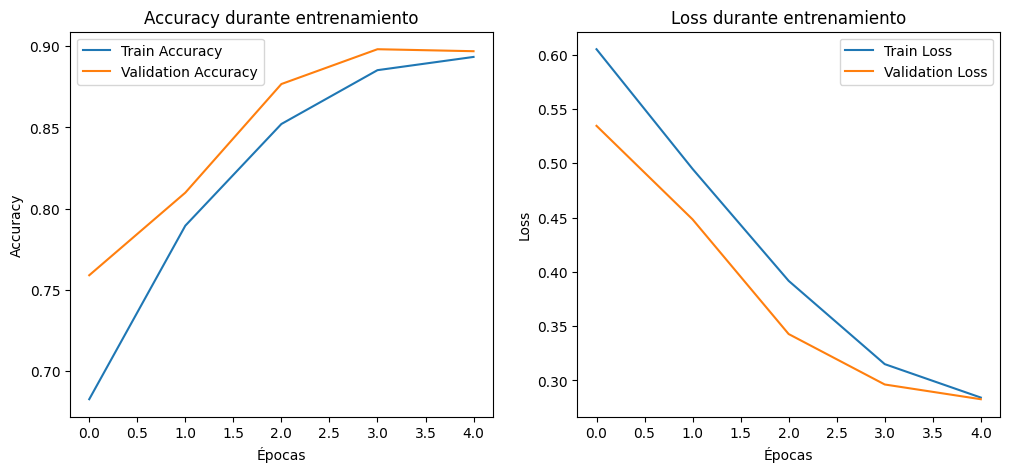

In [6]:
import matplotlib.pyplot as plt


# Graficar accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Graficar loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()


Accuracy durante entrenamiento:

La línea azul representa la accuracy en el conjunto de entrenamiento (Train Accuracy).

La línea naranja representa la accuracy en el conjunto de validación (Validation Accuracy).

La accuracy de entrenamiento empieza más baja y va aumentando constantemente hasta cerca de 0.89 en la última época.

La accuracy de validación comienza más alta y también mejora, llegando a un máximo cercano a 0.89 en la época 2, pero luego se estabiliza o incluso baja un poco.

Este comportamiento indica que el modelo aprende bien y generaliza correctamente durante las primeras épocas, pero después podría estar empezando a mostrar un leve sobreajuste (overfitting), ya que la accuracy en validación no mejora más y puede bajar un poco mientras la de entrenamiento sigue subiendo.

Loss durante entrenamiento:

La línea azul es la pérdida (loss) en el conjunto de entrenamiento.

La línea naranja es la pérdida en el conjunto de validación.

La loss de entrenamiento disminuye consistentemente desde cerca de 0.60 a 0.30, lo que indica que el modelo está aprendiendo y ajustando sus pesos.

La loss de validación también baja rápidamente al principio, llegando a cerca de 0.30, pero se mantiene algo más estable y no disminuye mucho después de la época 2.

Esto también respalda la idea de que el modelo aprende bien, pero a partir de la época 2-3 se estabiliza. La diferencia que se ve entre la loss de entrenamiento y validación no es muy grande, lo que indica que no hay un sobreajuste fuerte.

El modelo mejora rápidamente durante las primeras 2-3 épocas tanto en accuracy como en pérdida.
A partir de la época 3-4, la mejora en validación se estabiliza y puede incluso decrecer levemente, señal de un posible inicio de sobreajuste leve.